<a href="https://colab.research.google.com/github/usshaa/BK_BIRLA_DL/blob/main/03_DL/Regularization_techniques_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regularization Techniques in Deep Learning

### Objective:

To demonstrate how overfitting can be reduced using regularization techniques like:

* L1 (Lasso)
* L2 (Ridge)
* Dropout

### 1. Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

### ✅ 2. Generate Dataset (Non-linear)

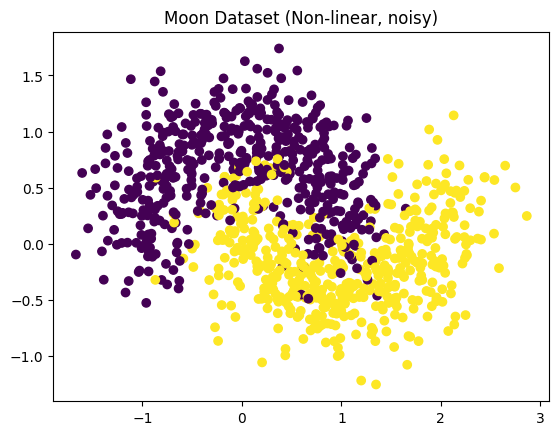

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Moon Dataset (Non-linear, noisy)")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Baseline Model (No Regularization)

In [ ]:
model_base = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_base = model_base.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

### Plot Accuracy and Loss

In [ ]:
def plot_history(histories, title):
    plt.figure(figsize=(14,5))

    for name, history in histories.items():
        plt.plot(history.history['val_loss'], label=f'{name} val_loss')

    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

### 4. Model with **L1 (Lasso) Regularization**

```
What is L1 Regularization (Lasso)?
l1(0.01) applies L1 penalty to the weights during training.
L1 regularization adds this term to the loss:
Encourages sparsity in the weights (i.e., many weights become exactly 0).
Useful for feature selection or when you want to simplify the model.
```

In [ ]:
model_l1 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(2,)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_l1 = model_l1.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

### 5. Model with **L2 (Ridge) Regularization**

```
What is L2 Regularization (Ridge)?
l2(0.01) adds a penalty term to the loss function:
Encourages smaller weights but doesn't force them to zero.
Helps in reducing overfitting by smoothing the model.
```

In [ ]:
model_l2 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_l2 = model_l2.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

### 6. Model with **Dropout Regularization**

```
Purpose of Dropout:
Dropout(0.5) means: randomly sets 50% of the neurons to 0 during each training step.
Prevents the model from memorizing the training data.
Encourages the network to learn more general, robust patterns.
```

In [ ]:
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

### Compare All Regularization Strategies

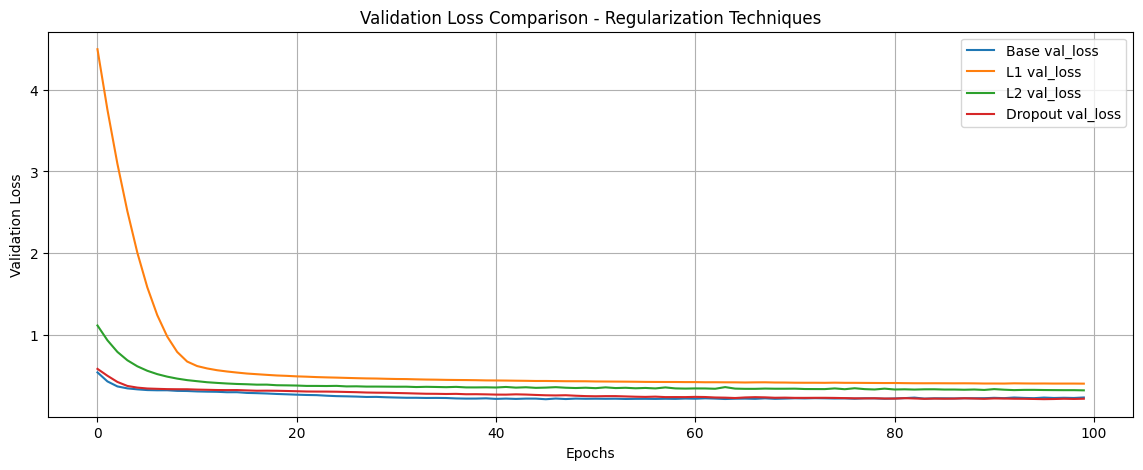

In [ ]:
plot_history({
    'Base': history_base,
    'L1': history_l1,
    'L2': history_l2,
    'Dropout': history_dropout
}, "Validation Loss Comparison - Regularization Techniques")

### Evaluate on Test Set

In [ ]:
models = {
    "Base": model_base,
    "L1": model_l1,
    "L2": model_l2,
    "Dropout": model_dropout
}

In [ ]:
for name, model in models.items():
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} - Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

Base - Test Accuracy: 0.9300, Test Loss: 0.1766
L1 - Test Accuracy: 0.8200, Test Loss: 0.4210
L2 - Test Accuracy: 0.8600, Test Loss: 0.3284
Dropout - Test Accuracy: 0.9200, Test Loss: 0.1952


### ✅ Summary: When to Use What?

| Technique  | Best For                             | Notes                        |
| - |  | - |
| L1 (Lasso) | Feature selection & sparse weights   | Pushes some weights to zero  |
| L2 (Ridge) | Smooth penalization of weights       | Keeps all weights, but small |
| Dropout    | Preventing co-adaptation in networks | Simple & effective           |